In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score


In [3]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [7]:
df.shape

(1599, 12)

In [8]:
#ProfileReport(df)

In [9]:
X=df.drop("quality",axis=1)
y=df["quality"]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=30)

In [11]:
X_train.shape,X_test.shape

((1199, 11), (400, 11))

In [12]:
y_train.shape,y_test.shape

((1199,), (400,))

In [13]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
import sklearn
from sklearn import tree

In [15]:
sklearn.__version__

'1.3.1'

[Text(0.5511651689914163, 0.9722222222222222, 'x[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(0.3264518508583691, 0.9166666666666666, 'x[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(0.20569340128755365, 0.8611111111111112, 'x[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(0.07888948497854077, 0.8055555555555556, 'x[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(0.055740343347639484, 0.75, 'x[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(0.019742489270386267, 0.6944444444444444, 'x[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(0.012875536480686695, 0.6388888888888888, 'x[0] <= 7.1\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.00944206008583691, 0.5833333333333334, 'x[6] <= 23.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.00600858369

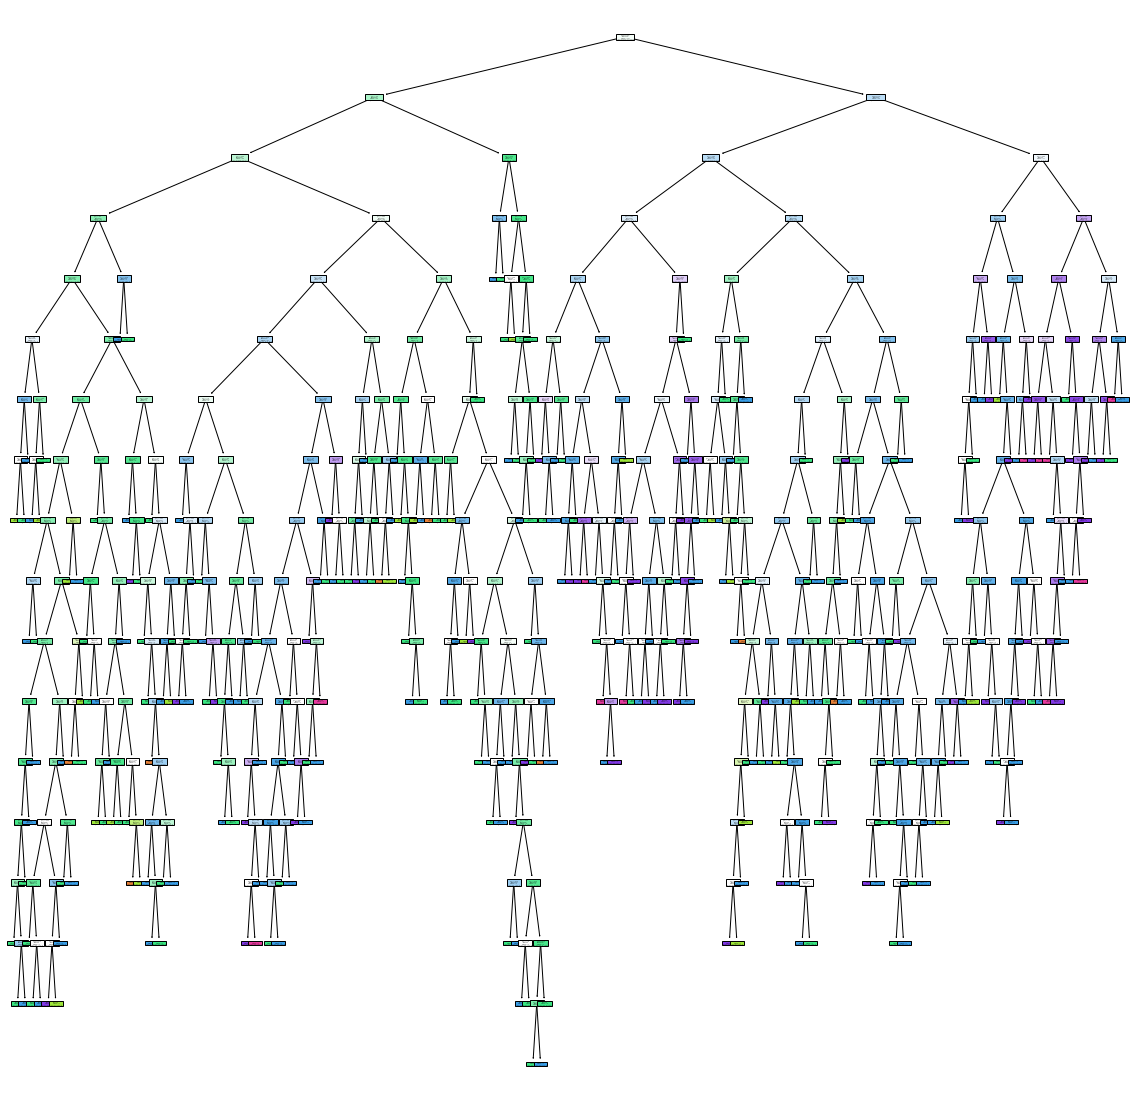

In [16]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True)

In [17]:
df1=df.head(500) #lets see a sample tree.

In [18]:
x1=df1.drop("quality",axis=1)
y1=df1.quality

In [19]:
clf1=DecisionTreeClassifier()
clf1.fit(x1,y1)

DecisionTreeClassifier()

[Text(0.44254241689750695, 0.9705882352941176, 'x[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(0.27204524469067404, 0.9117647058823529, 'x[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(0.17289935364727607, 0.8529411764705882, 'x[2] <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(0.07987072945521699, 0.7941176470588235, 'x[10] <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]'),
 Text(0.029547553093259463, 0.7352941176470589, 'x[9] <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]'),
 Text(0.0221606648199446, 0.6764705882352942, 'x[6] <= 26.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]'),
 Text(0.014773776546629732, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.029547553093259463, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.03693444136657433, 0.6764705882352942, 'gini

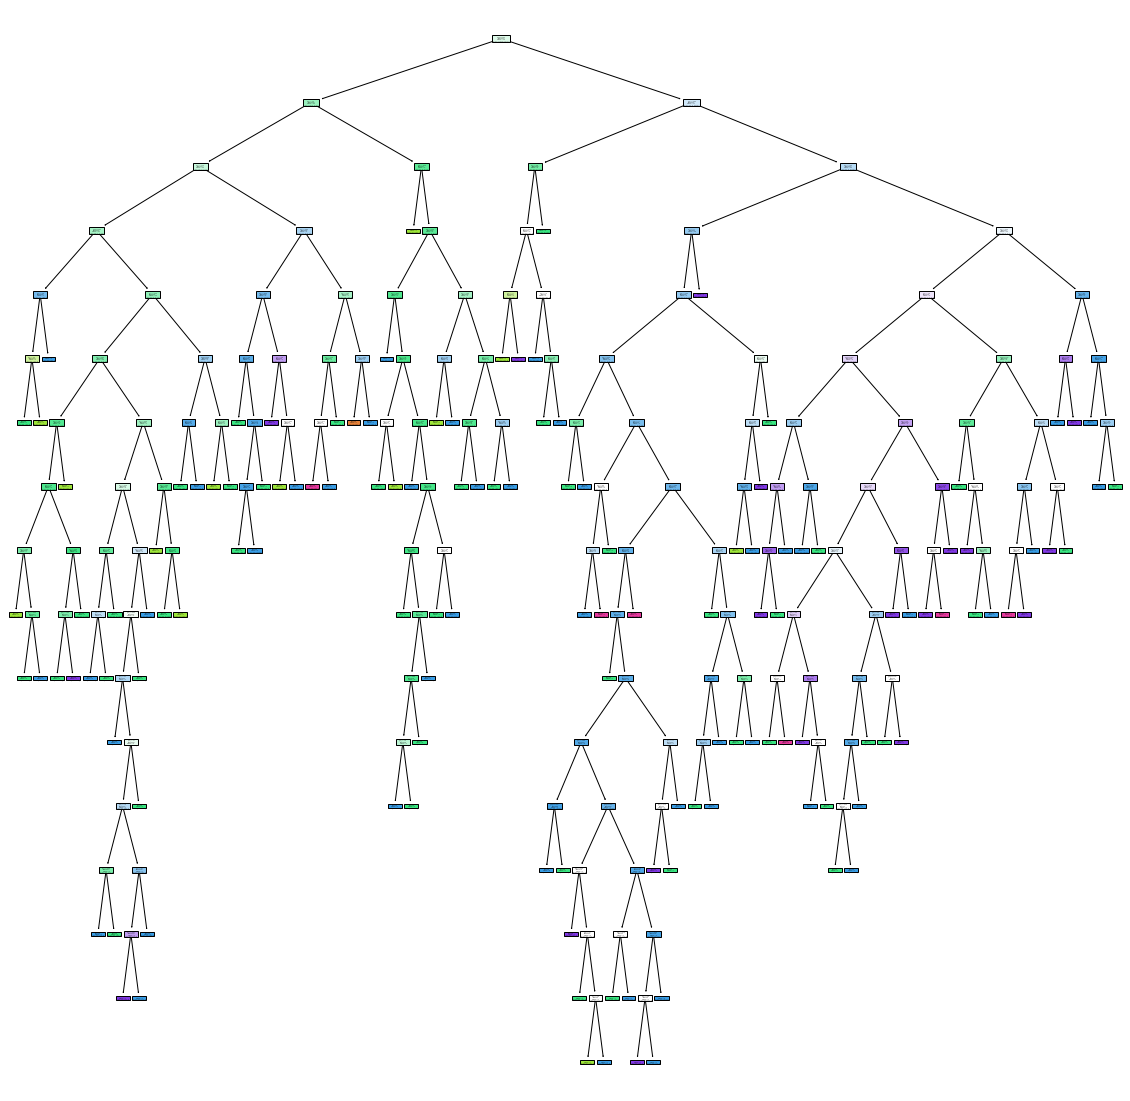

In [20]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf1, filled=True)

In [21]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
set(y1)

{3, 4, 5, 6, 7, 8}

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf1, filled=True, class_names=[str(i) for i in set(y1)])

[Text(0.44254241689750695, 0.9705882352941176, 'x[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]\nclass = 5'),
 Text(0.27204524469067404, 0.9117647058823529, 'x[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]\nclass = 5'),
 Text(0.17289935364727607, 0.8529411764705882, 'x[2] <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]\nclass = 5'),
 Text(0.07987072945521699, 0.7941176470588235, 'x[10] <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]\nclass = 5'),
 Text(0.029547553093259463, 0.7352941176470589, 'x[9] <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]\nclass = 6'),
 Text(0.0221606648199446, 0.6764705882352942, 'x[6] <= 26.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]\nclass = 4'),
 Text(0.014773776546629732, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]\nclass = 5'),
 Text(0.029547553093259463, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue

In [ ]:
clf1.predict(x1)

In [ ]:
clf1.score(x1,y1)

In [ ]:
clf1.score(X_test,y_test)

In [ ]:
path=clf1.cost_complexity_pruning_path(x1,y1) #Removing the Branches.  #default ccp value is 0.
path

In [ ]:
ccp_alphas=path["ccp_alphas"]
ccp_alphas

In [ ]:
#now we will try to find where we have to prune a tree.
#At what part of ccp alpha value we have the similar accuracy of both train and test data.
#thats where we will not find the overfitted model. 

In [ ]:
clf2=[]
for ccp in ccp_alphas:
    dt_m= DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    clf2.append(dt_m)

In [ ]:
clf2

so which model we will select on the above ccp models? we will select the model which is the least overfitted one.

we will select the threshold of ccp alpha. from where we will find which branch to take and which to prune.

In [ ]:
train_score=[i.score(x1,y1) for i in clf2]
train_score

In [ ]:
test_score=[i.score(X_test,y_test) for i in clf2]
test_score

In [ ]:
fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_score,marker="o", label="test",drawstyle="steps-post")
ax.legend()
plt.show()

we have only used 120 samples in this dataset out of whole, that's why the train and test are seperate. if there was whole data then the train and test data will come closer and meet at a point which is in between 0.01-0.02 in the above diagram.

In [ ]:
clf_ccp= DecisionTreeClassifier(random_state=0, ccp_alpha=0.014)
clf_ccp.fit(x1,y1)

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf_ccp,filled=True)

we can see that the same data that we are training over the above data before was so much complex than the above tree. That's how we will do hyperparameter tuning by using cost_complexity_pruning_path(ccp) alpha/ purning method value by testing different alpha value in the model.

In [ ]:
clf_ccp.score(x1,y1)

In [ ]:
clf_ccp.score(X_test,y_test)

This is how are removing the overfitting and underfitting of the model. like we are able to minimize the gap between accuracy of train and test data.

If dont want to do the manual import of parameters then let the machine decide the best parameters out of the data and do the prediction then we will use the method of GridSearchCV and RandomSearchCV

## GridSearchCV and RandomSearchCV

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.

In [ ]:
grid_pram= {"criterion":["gini","entropy"],
           "splitter":["best","random"],
           "max_depth":range(2,40,1),
           "min_samples_split":range(2,10,1),
           "min_samples_leaf":range(1,10,1)
           }

In [ ]:
grid_ccp=GridSearchCV(estimator=clf_ccp,param_grid=grid_pram,cv=5, n_jobs=-1, ) #n_jobs:-1 means engage all my processors.

In [ ]:
grid_ccp.fit(x1,y1)

In [ ]:
grid_ccp.best_params_

This is the best parameter we can use in the model.

In [ ]:
clf_ccp_new=DecisionTreeClassifier(criterion="entropy", max_depth=15, min_samples_leaf=2, min_samples_split=2,splitter="random",ccp_alpha=0.014)

In [ ]:
clf_ccp_new.fit(x1,y1)

In [ ]:
clf_ccp_new.score(x1,y1)

In [ ]:
clf_ccp_new.score(X_test,y_test)

In [ ]:
pred=clf_ccp_new.predict(X_train)

In [ ]:
confusion_matrix(y_train,pred)